## 2d diffusion 
$$
\frac{\partial u}{\partial t} = v\frac{\partial^2 u}{\partial x^2} + v\frac{\partial^2 u}{\partial y^2}
$$

v = viscosity
finite diffrence

$$
\frac{u^{n+1}_{i,j}-u^{n}_{i,j}}{\Delta t} = v\frac{u^{n}_{i+1,j}-2u^{n}_{i,j}+u^{n}_{i-1,j}}{\Delta x^2} + \frac{u^{n}_{i,j+1}-2u^{n}_{i,j}+u^{n}_{i,j-1}}{\Delta y^2}
$$

$$
u^{n+1}_{i,j} = u^{n}_{i,j} + \Delta t(v\frac{u^{n}_{i+1,j}-2u^{n}_{i,j}+u^{n}_{i-1,j}}{\Delta x^2} + \frac{u^{n}_{i,j+1}-2u^{n}_{i,j}+u^{n}_{i,j-1}}{\Delta y^2})
$$


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

Text(0.5, 0, 'y')

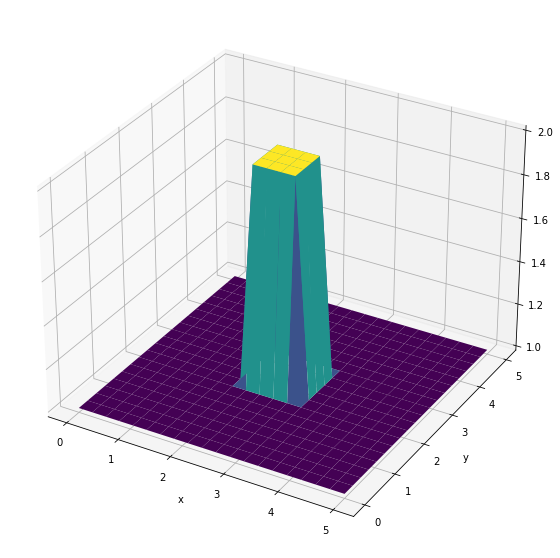

In [68]:
#constants 
v = 0.1

x_max = 5
y_max = 5
nx = 20
ny = 20
dx = x_max / (nx)
dy = y_max / (ny)
T = 3
nt = 200
dt = T / nt
xs = np.linspace(0, x_max, nx)
ys = np.linspace(0, y_max, ny)


# init 
u_init = np.zeros((ny,nx))
u_init[:] = 1
u_init[int(2/dy):int(3/dy) , int(2/dx):int(3/dx)] = 2           #u[y,x]


u0 = u_init.copy()

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)

ax.set_xlabel('x')
ax.set_ylabel('y')




(0.0, 2.0)

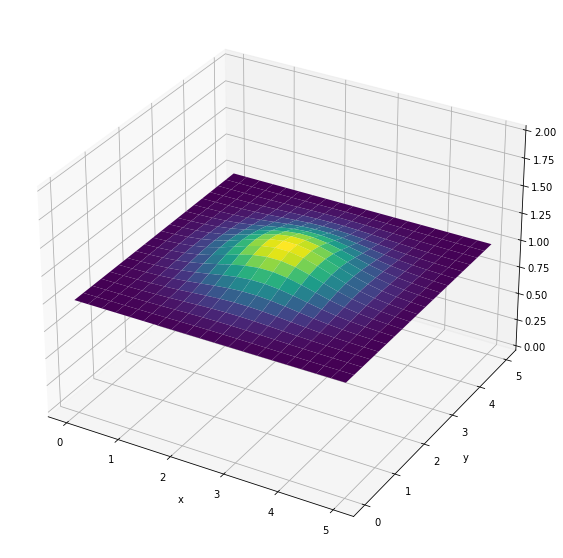

In [69]:
# intit
u0 = u_init.copy()

# finite difference 
for _ in range(nt):
    u = u0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i,j] = u[i,j] + v * (dt/dx**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + v * (dt/dy**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlim(0,2)

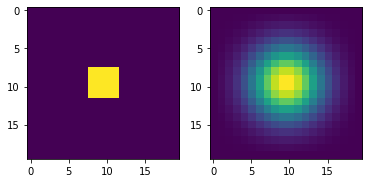

In [70]:
u0 = u_init.copy()

# heat map check 
for _ in range(nt):
    u = u0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i,j] = u[i,j] + v * (dt/dx**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + v * (dt/dy**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])

plt.subplot(1,2,1)
plt.imshow(u_init)
plt.subplot(1,2,2)
plt.imshow(u0)


MovieWriter ffmpeg unavailable; using Pillow instead.


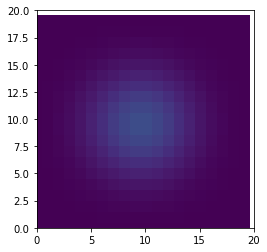

In [71]:
u0 = u_init.copy()

# animate
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, nx), ylim=(0, ny))
line = plt.imshow(u0)

def animate(frames):
    u = u0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u0[i,j] = u[i,j] + v * (dt/dx**2) *(u[i+1,j] -2*u[i,j]+u[i-1,j]) + v * (dt/dy**2) *(u[i,j+1]-2*u[i,j]+u[i,j-1])
    line.set_data(u0)
    return line

anim = animation.FuncAnimation(fig, animate, frames=nt, repeat=True)
anim.save('2d diffusion.gif', fps = 20)
